In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb

# New - may need to install statsmodels and sklearn packages
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # may need to install sklearn - machine learning package

## Week 10 Assignment: Evaluating Linear Regression Model, Conceptually

#### Data:  Pressure, temperature, and precipitation data from Guayaquil, Ecuador, June 1950-1970: 'June_Guayaquil.csv'
- This data is sample data used in your stats textbook!  Pressure, temperature, and precipitation data collected in Ecuador over 20 years of Junes!
<br><br>
- You'll read in the data, do some processing and EDA
<br><br>
- Then, you'll run a linear regression model and interpret the various evaluation metrics!
   - Don't worry - I will give you the code for the linear regression model itself (you'll learn how to do this yourself in a few weeks, formally)
   - You'll just decide what variable is X (predictor) and which is Y (predictand)
   - And then interpret RMSE, R^2, statistical significance, and the residuals!

#### (1)  Read in the data.  What should be your index?  Does the data need cleaning in any way?  Do what is needed.

In [ ]:
# Read in data
df = pd.read_csv('June_Guayaquil.csv', header=0, index_col='Year')

# Drop rows with NaNs
df.dropna(axis=0, how='any', inplace=True)

df

,"Temperature, C","Precipitation, mm","Pressure, mb"
Year,,,
1951,26.1,43.0,1009.5
1952,24.5,10.0,1010.9
1953,24.8,4.0,1010.7
1954,24.5,0.0,1011.2
1955,24.1,2.0,1011.9
1957,26.4,31.0,1009.3
1958,24.9,0.0,1011.1
1959,23.7,0.0,1012.0
1960,23.5,0.0,1011.4


#### (2)  
#### (a.) Do exploratory data analysis (specifically, from your lessons, Step #3 of visualizing any relationships, etc., as you already cleaned your data in the previous step).    

#### (b.)  From your EDA, which two variables do you want to run a simple LINEAR regression on, and why?

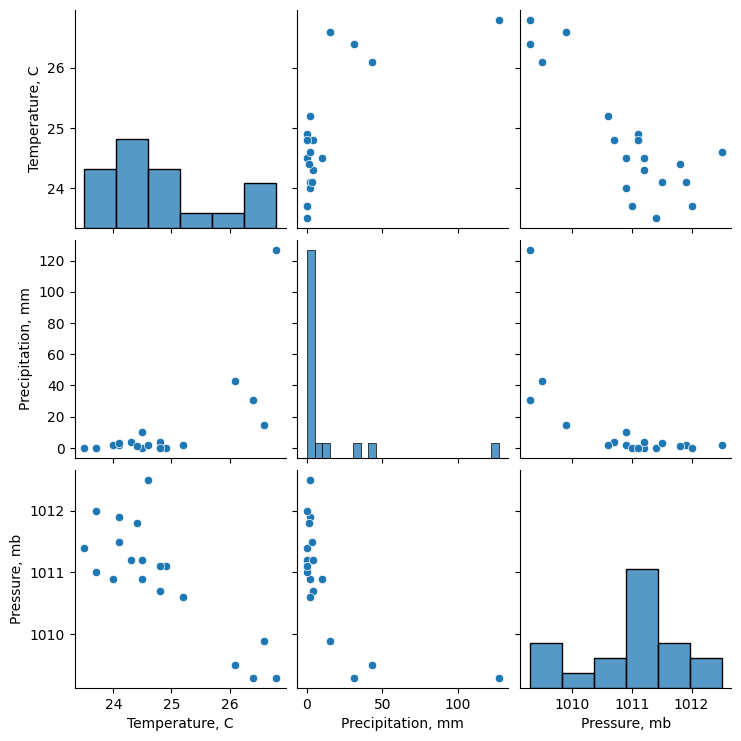

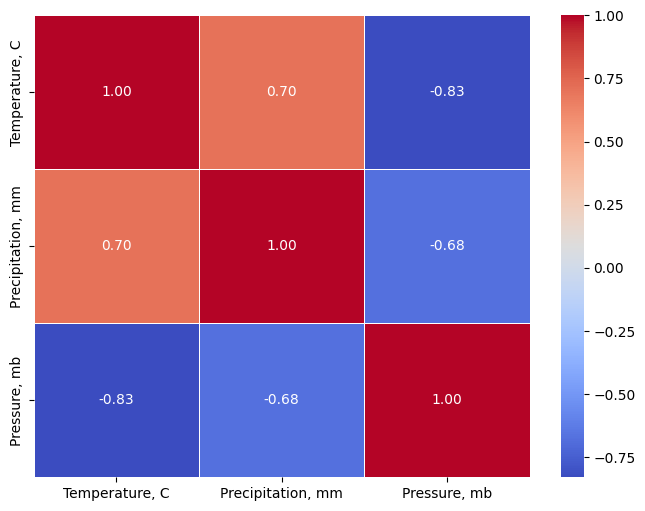

In [20]:
# a.)

# Plot scatter matrix of the variables within dataset
sb.pairplot(df)

# Calculate correlations between each var
corr_matrix = df.corr()

# Plot correlattion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
# b.)

# I will choose temperature and pressure to perform the regression on because those two variables have the strongest correlation (albiet negatively) between each other, therefore a regression
# model may do a better job at being able to predict the relationship between these variables. 

#### (3)  Now, run the linear regression! 
#### First, set x = your predictor, and y = your predictand.  Make no more changes in this code block, it will create the linear regression for you, as well as spit out the evaluation metrics.

In [21]:
x = df['Pressure, mb']
y = df['Temperature, C']

# I run the linear regression
x2 = sm.add_constant(x) # necessary if we want regression equation to have intercept

mod_uni = sm.OLS(y,x2).fit()
y_pred_uni = mod_uni.fittedvalues

# What if wanted to make predictions using different data for x?
# mod_uni.predict(x2) # make the predictions by the model

In [22]:
# Let's print out some model evaluation metrics!
# See your lessons for how to read this "summary"
print(mod_uni.summary())

                            OLS Regression Results                            
Dep. Variable:         Temperature, C   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     37.65
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.10e-05
Time:                        14:33:26   Log-Likelihood:                -15.362
No. Observations:                  19   AIC:                             34.72
Df Residuals:                      17   BIC:                             36.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          955.5388    151.685      6.299   

/global/homes/d/dbrooks/.conda/envs/myenv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
# Here is RMSE
rmse_err_uni = mean_squared_error(y, y_pred_uni)
rmse_err_uni = np.sqrt(rmse_err_uni) # Need to add since the 'squared' argument got removed in mean_squared_error
print('RMSE = ', rmse_err_uni)

RMSE =  0.543124762724124


In [ ]:
# And R^2 (which is also outputted as a part of the above table)
print('R^2 = ', mod_uni.rsquared)

R^2 =  0.688936708108392


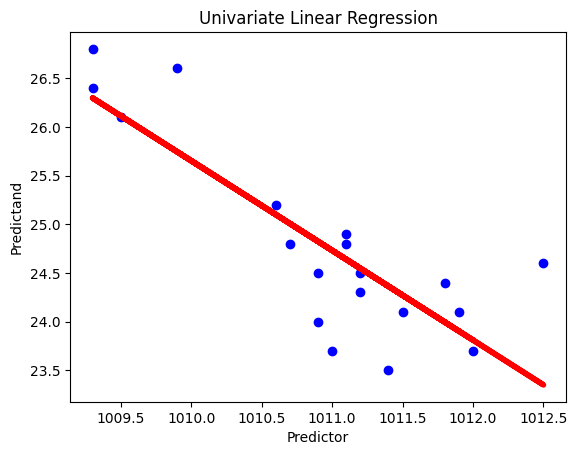

In [26]:
# Here's your linear regression line plotted against your original data, so you can visualize the "fit"

fig,ax=plt.subplots()
ax.scatter(x, y, color='blue')

ax.set_xlabel('Predictor')
ax.set_ylabel('Predictand')
ax.set_title('Univariate Linear Regression')

ax.plot(x, y_pred_uni, color='red',linewidth=4)

Text(0.5, 1.0, 'Residuals')

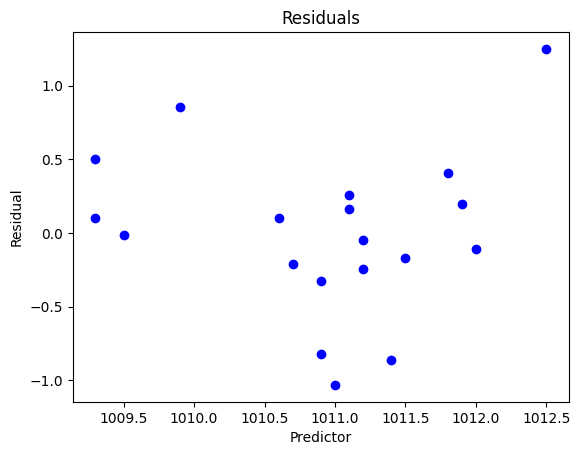

In [27]:
# And here are the residuals from the regression!
fig,ax=plt.subplots()
ax.scatter(x, y-y_pred_uni,color='b')
ax.set_xlabel('Predictor')
ax.set_ylabel('Residual')
ax.set_title('Residuals')

#### (4)  To finish - comment on EACH of the FOUR evaluation metrics for this regression and in at least a FEW sentences for each, discuss what each metric tells us about this regression model we've created AND what each metric tells us about how "good' this model is.  
#### Then, based on all four metrics, give your overall evaluation of the regression model and how 'good' it is, including anything we could consider doing differently to improve this model.
#### (a)  R^2 
#### (b) RMSE
#### (c) Statistical significance
#### (d) Patterns in residuals
#### (e) Overall conclusion based on the four evaluation metrics, and any future steps for improvement!

In [ ]:
# (a) R^2

# The R^2 value for this model is approximately 0.69, which indicates that about 69% of the variation in temperature can be described by our model. Given that we are only using one predictor for
# this model, that being pressure, I would say that this is a decent performance by the model. Obviously there is still quite a bit of variation in temperature that is unexplained by the model,
# which tells us that pressure is not the only factor in the temperature variation in this dataset. If we wanted to improve this model, we could try adding additional factors and seeing whether the
# adjusted R^2 value increases, but for just one predictor, a 0.69 R^2 is a good start. 

In [ ]:
# (b) RMSE

# The RMSE for this model is approx. 0.54, which means that the model had an average error of 0.54 degrees C when trying to predict temperature based on the pressure. Given that we are looking at
# temperature, an error of 0.54 C is not that bad. If I were to predict the exact temperature tomorrrow and was only off by that margin, I would consider that a decent prediction. However, there
# is still room for improvement as you don't want to settle for an average error that high if you were to use this model to predict temperature for serious forecasting applications. 

# That said, the range of our full dataset is about 3 degrees C, so when we take that into account, an error of 0.54 can make a significant difference, so maybe its not that great. 

In [ ]:
# (c) Statistical significance 

# If we take a look at the p-value for the t-test (P>|t|), we will see that it is 0. Since this is less than 0.05, we can say that there is sufficient evidence from this sample of data to 
# reject the null hypothesis (that pressure does not have a relationship with temperature) for the entire population of data, which in our case the population of data could be all temperature and pressure
# data from this particular region of Ecuador. In other words, we can say that temperature and pressure do have a linear relationship based on this test, and therefore the regression
# coefficients from this model are statistically significant. 

In [ ]:
# (d) Patterns in residuals

# Judging by the scatter plot of the residuals, it's clear to me that there is no obvious pattern with the residuals and they appear more random, which is considered a good thing. If our residuals
# showed a more consistent pattern, such as a curve or cone shape, this would indicate that the errors have some degree of predictabiliity and there is some key aspect of the model that is wrong
# or missing. The residuals also range from about -1 to 1, which means that the model's "margin of error" when predicting temperature is about +/- 1 degree C. Considering this model only uses
# one predictor, that range of error is not too bad. 

In [ ]:
# (e) Overall conclusion about your model

# Overall, I would say that this model is a good start if you are trying to predict temperature. Temperature and pressure variation are physically linked through thermodynamic processes, 
# so it makes sense that we found that this simple regression to be statistically significant, allowing us to make a decent prediciton of temperature simply based on pressure. That said,
# if we wanted a more accurate and precise prediction of temperature, we could try including other meteorological parameters in our model such as humidity, wind directtion, and solar radiation
# which may be able to explain more of the temperature variability that pressure alone cannot explain, as currently the pressure predictor only accounts for 69% of the variability in the model. 
# Adding more data points could also help, as here we are only looking at 19 observations, which is not that many in the grand scheme of things, especially when concerned with climatological observations. 
# It may also be worth trying other types of regression, such as a polynomial fit as having a purely linear fit may miss some of the natural variation and create larger errors. 
